In [166]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [167]:
import os
import re
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import glob
import math
import numpy as np
import pandas as pd
from bisect import *
from decimal import Decimal

    time     ncalls        memtot     memlive     maxlive
0     10     436813  5.578830e+08    42114230    42360014
1     20     649072  7.796060e+08    43057496    43292993
2     30    5329016  1.435560e+09    67448836   127885760
3     40    9539423  3.356880e+09   463125260   463125260
4     50   20302319  5.971210e+09   893124305   898108639
5     60   38210541  8.447390e+09  1143410541  1178764851
6     70   68298296  1.311900e+10  1243885713  1263236118
7     80  102332816  1.697610e+10  2172454088  2172455304
8     90  124693790  2.121220e+10  3170190690  3533684214
9    100  157164916  2.814320e+10  3744786409  3809620679
10   110  201851523  3.528320e+10  3768670756  3817221293
11   120  244843433  4.294120e+10  3752968058  3829126479
12   130  290356978  5.052540e+10  3830487924  3840598685
13   140  333515507  5.733530e+10  3832156315  3876406606
14   150  380132651  6.455810e+10  3858558624  3885410094
15   160  424811828  7.176050e+10  3845330603  3913032621
16   170  4721

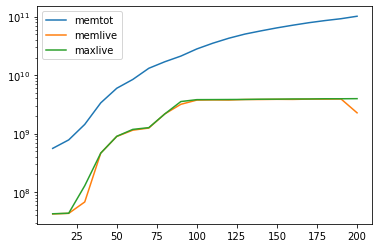

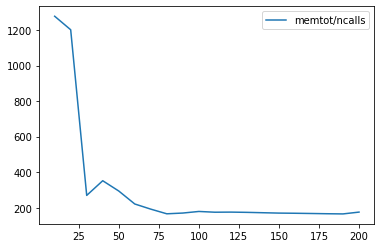

    time      ncalls        memtot       memlive       maxlive
0    NaN         NaN           NaN           NaN           NaN
1   10.0    212259.0  2.217230e+08  9.432660e+05  9.329790e+05
2   10.0   4679944.0  6.559540e+08  2.439134e+07  8.459277e+07
3   10.0   4210407.0  1.921320e+09  3.956764e+08  3.352395e+08
4   10.0  10762896.0  2.614330e+09  4.299990e+08  4.349834e+08
5   10.0  17908222.0  2.476180e+09  2.502862e+08  2.806562e+08
6   10.0  30087755.0  4.671610e+09  1.004752e+08  8.447127e+07
7   10.0  34034520.0  3.857100e+09  9.285684e+08  9.092192e+08
8   10.0  22360974.0  4.236100e+09  9.977366e+08  1.361229e+09
9   10.0  32471126.0  6.931000e+09  5.745957e+08  2.759365e+08
10  10.0  44686607.0  7.140000e+09  2.388435e+07  7.600614e+06
11  10.0  42991910.0  7.658000e+09 -1.570270e+07  1.190519e+07
12  10.0  45513545.0  7.584200e+09  7.751987e+07  1.147221e+07
13  10.0  43158529.0  6.809900e+09  1.668391e+06  3.580792e+07
14  10.0  46617144.0  7.222800e+09  2.640231e+07  9.003

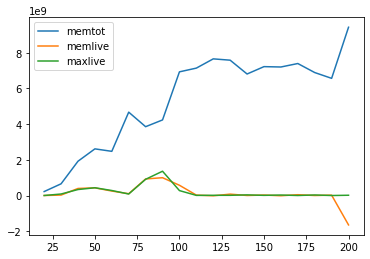

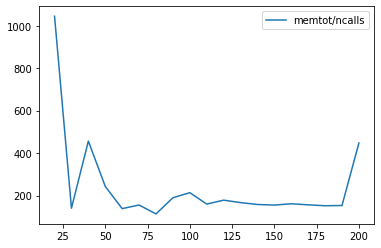

In [195]:
file = '/Users/innocent/MallocProfiler/demos/memstat.dat'
dat = pd.read_csv(file, delimiter=" ")
print(dat)
plt.plot(dat["time"],dat['memtot'],label="memtot")
plt.plot(dat["time"],dat['memlive'],label="memlive")
plt.plot(dat["time"],dat['maxlive'],label="maxlive")
plt.yscale("log")
plt.legend(loc='upper left')
plt.show()
plt.plot(dat["time"],dat['memtot']/dat['ncalls'],label="memtot/ncalls")
plt.legend(loc='upper right')
plt.show()
df = dat.diff()
print(df)
plt.plot(dat["time"],df['memtot'],label="memtot")
plt.plot(dat["time"],df['memlive'],label="memlive")
plt.plot(dat["time"],df['maxlive'],label="maxlive")
#plt.yscale("log")
plt.legend(loc='upper left')
plt.show()
plt.plot(dat["time"],df['memtot']/df['ncalls'],label="memtot/ncalls")
plt.legend(loc='upper right')
plt.show()

In [168]:
# Fixing bin edges
HIST_BINS = np.linspace(0, 32, 32)

#files
totf = '/Users/innocent/MallocProfiler/demos/memtotHist.csv'
livef = '/Users/innocent/MallocProfiler/demos/memliveHist.csv'

tot = np.genfromtxt(totf, delimiter=",",filling_values=0)
live = np.genfromtxt(livef, delimiter=",",filling_values=0)
print(tot.max())
print(tot.shape[0])
print(tot[0])


188406486.0
20
[0.00000e+00 2.16600e+03 1.00000e+00 2.00000e+01 2.03000e+02 6.78130e+04
 6.13750e+04 3.10380e+04 1.80270e+04 3.03030e+04 1.58077e+05 3.67250e+04
 1.11290e+04 8.50000e+03 8.24100e+03 3.17000e+02 1.39000e+03 4.88000e+02
 9.62000e+02 3.00000e+01 6.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]


In [169]:
def prepare_animation(bar_container,hist):

    def animate(frame_number):
        # read data in
        #print(frame_number)
        data = hist[frame_number][:32]
        for count, rect in zip(data, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate

In [170]:
def plot(hist,file,col) :
  # Output generated via `matplotlib.animation.Animation.to_jshtml`.
  # dummy just to start out
  data = np.array([0,0])
  fig, ax = plt.subplots()
  _, _, bar_container = ax.hist(data, HIST_BINS, lw=1,
                              ec="yellow", fc=col, alpha=0.5)
  ax.set_ylim(bottom=0.1,top=1.1*hist.max())  # set safe limit to ensure that all data is visible.
  # ax.set_yscale("log")
  ani = animation.FuncAnimation(fig, prepare_animation(bar_container,hist), tot.shape[0],
                              repeat=False, blit=True)
  ani.save(filename=file, writer="html")
  plt.show()

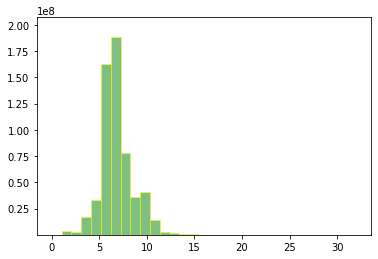

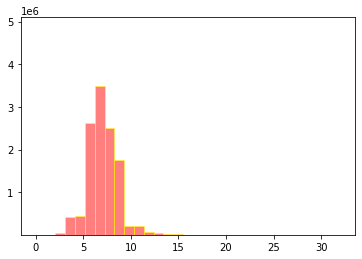

In [171]:
plot(tot,'/tmp/memtot.html',"green")
plot(live,'/tmp/memlive.html',"red")